In [11]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/covtype.csv')

In [4]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


Выведем статистики датафрейма без целевой переменной и one-hot столбцов

In [ ]:
df.drop(columns=df.columns[10:]).describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,7.000000


Построим гистограмму распределения классов

<BarContainer object of 7 artists>

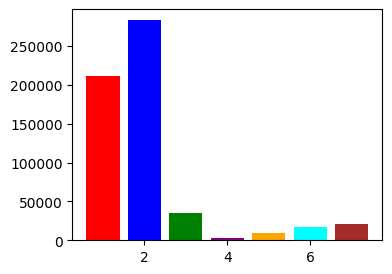

In [14]:
class_counts = pd.Series(df['Cover_Type']).value_counts().sort_index()
fig, ax = plt.subplots(figsize=(4, 3))
colors = ["red", "blue", "green", "purple", "orange", "cyan", "brown"]
ax.bar(class_counts.index, class_counts.values, color=colors)

In [5]:
X = df.drop(columns='Cover_Type')
y = df['Cover_Type']

Применим StandardScaler, обучим Catboost на трейн выборке и сохраним его

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='MultiClass', cat_features=[])

model.fit(X_train_scaled, y_train, verbose=200)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

model.save_model('catboost_forest_cover_type.model')

print(classification_report(y_test, y_pred))

0:	learn: 1.6764241	total: 220ms	remaining: 3m 39s
200:	learn: 0.4727552	total: 21.2s	remaining: 1m 24s
400:	learn: 0.3970818	total: 41.8s	remaining: 1m 2s
600:	learn: 0.3548123	total: 1m 3s	remaining: 41.9s
800:	learn: 0.3244698	total: 1m 24s	remaining: 21s
999:	learn: 0.3009443	total: 1m 46s	remaining: 0us
Accuracy: 88.01%
              precision    recall  f1-score   support

           1       0.88      0.85      0.87     42368
           2       0.88      0.91      0.90     56661
           3       0.88      0.91      0.89      7151
           4       0.85      0.83      0.84       549
           5       0.87      0.58      0.69      1899
           6       0.85      0.77      0.80      3473
           7       0.93      0.88      0.90      4102

    accuracy                           0.88    116203
   macro avg       0.88      0.82      0.84    116203
weighted avg       0.88      0.88      0.88    116203



Сохраним тренировочную выборку в csv-файл для того, чтобы в ML-консюмере фитить на нем StandardScaler.

Также разделим тестовую выборку на 2 части и сохраним в отдельные csv-файлы, чтобы имитировать сбор и отправку данных двумя продюсерами

In [ ]:
train_df = pd.DataFrame(X_train, columns=X.columns)
train_df['Cover_Type'] = y_train

X_test_1, X_test_2, y_test_1, y_test_2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)
test_1_df = pd.DataFrame(X_test_1, columns=X.columns)
test_1_df['Cover_Type'] = y_test_1

test_2_df = pd.DataFrame(X_test_2, columns=X.columns)
test_2_df['Cover_Type'] = y_test_2

train_df.to_csv('data/train.csv', index=False)
test_1_df.to_csv('data/test_1.csv', index=False)
test_2_df.to_csv('data/test_2.csv', index=False)